In [4]:
import pandas as pd
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
import seaborn as sb
import joblib 
 



In [5]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lsula\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Lsula\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [6]:
# Load the dataset
data = pd.read_csv('data.csv')

data.head()

,label,title,text,subject,date
0,1,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,1,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,1,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,1,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39942 entries, 0 to 39941
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    39942 non-null  int64 
 1   title    39942 non-null  object
 2   text     39942 non-null  object
 3   subject  39942 non-null  object
 4   date     39942 non-null  object
dtypes: int64(1), object(4)
memory usage: 1.5+ MB


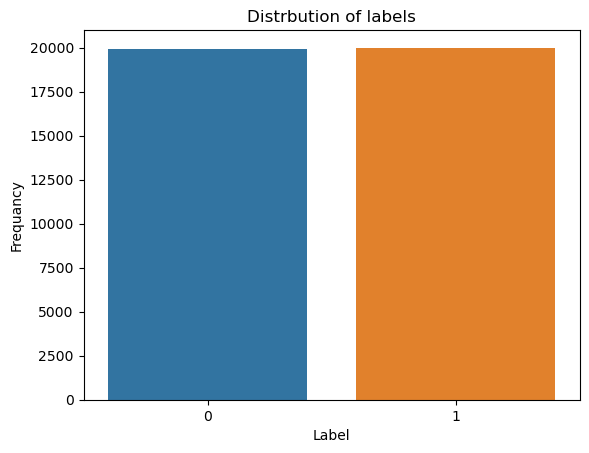

In [8]:
sb.countplot(x='label',data=data)
plt.title("Distrbution of labels")
plt.xlabel("Label")
plt.ylabel("Frequancy")
plt.show();

In [9]:
# Preprocessing function
def preprocess_text(text):

    # Convert to lowercase
    text = text.lower()

    # Remove special characters and numbers
    text = re.sub(r'[^a-z\s]', '', text)

    # Tokenize and remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    return ' '.join(tokens)


In [10]:
data['text'] = data['text'].apply(preprocess_text)

In [11]:

X = data['text'] 
y = data['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature extraction using TF-IDF
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_df=0.95, min_df=0.02)


In [ ]:
from sklearn.metrics import accuracy_score, classification_report, log_loss
# Fit and transform the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transform the test data 
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# rain the model using Logistic Regression
classifier = LogisticRegression(solver='liblinear')

# Train the classifier on the transformed training data
classifier.fit(X_train_tfidf, y_train)

# Make predictions on the test set
y_pred = classifier.predict(X_test_tfidf)
y_pred_proba = classifier.predict_proba(X_test_tfidf)  # Needed for log loss

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
loss = log_loss(y_test, y_pred_proba)  # Log loss

print(f'Accuracy: {accuracy * 100:.2f}%')
print(f'Log Loss: {loss:.4f}')

print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 98.86%
Log Loss: 0.0616

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99      3996
           1       0.98      0.99      0.99      3993

    accuracy                           0.99      7989
   macro avg       0.99      0.99      0.99      7989
weighted avg       0.99      0.99      0.99      7989



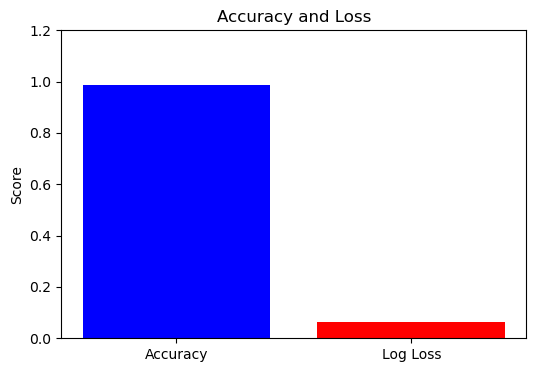

In [13]:
# Plot Accuracy and Loss
metrics = ["Accuracy", "Log Loss"]
values = [accuracy, loss]

plt.figure(figsize=(6, 4))
plt.bar(metrics, values, color=['blue', 'red'])
plt.ylabel('Score')
plt.title('Accuracy and Loss')
plt.ylim(0, 1.2)  # Adjust scale for better visualization
plt.show()

In [14]:
# Save the model
joblib.dump(classifier, 'logistic_regression_model.pkl')

['logistic_regression_model.pkl']

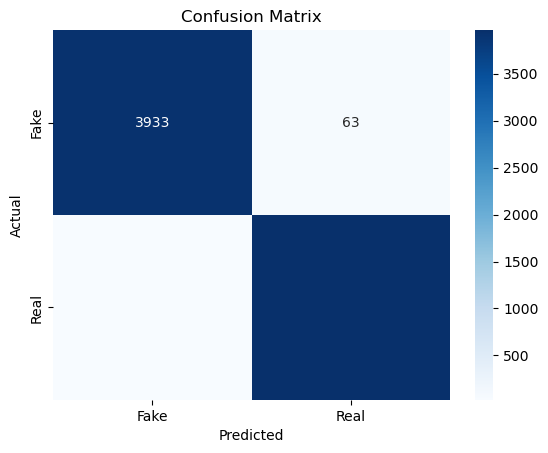

In [16]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
